## Team 52


*   Anghelo Daniel Pérez Martínez (A01795323)
*   Luis Daniel Ortega Muñoz (A01795197)
*   Emil Khaleb Palomino Bruzzón (A00826811)
*   José de Jesús Peña Rodríguez (A01794940)
*   Gerardo Miguel Pérez Solis (A01795599)

## TC 5033
# **Word Embeddings**

<br>

#### Activity 3a: Exploring Word Embeddings with GloVe and Numpy
<br>

- Objective:
    - To understand the concept of word embeddings and their significance in Natural Language Processing.
    - To learn how to manipulate and visualize high-dimensional data using dimensionality reduction techniques like PCA and t-SNE.
    - To gain hands-on experience in implementing word similarity and analogies using GloVe embeddings and Numpy.
    
<br>

- Instructions:
    - Download GloVe pre-trained vectors from the provided link in Canvas, the official public project:
    Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation
    https://nlp.stanford.edu/data/glove.6B.zip

    - Create a dictorionay of the embeddings so that you carry out fast look ups. Save that dictionary e.g. as a serialized file for faster loading in future uses.
    
    - PCA and t-SNE Visualization: After loading the GloVe embeddings, use Numpy and Sklearn to perform PCA and t-SNE to reduce the dimensionality of the embeddings and visualize them in a 2D or 3D space.

    - Word Similarity: Implement a function that takes a word as input and returns the 'n' most similar words based on their embeddings. You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Word Analogies: Implement a function to solve analogies between words. For example, "man is to king as woman is to ____". You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Submission: This activity is to be submitted in teams of 3 or 4. Only one person should submit the final work, with the full names of all team members included in a markdown cell at the beginning of the notebook.
    
<br>

- Evaluation Criteria:

    - Code Quality (40%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity.
    
   - Functionality (60%): All functions should work as intended, without errors.
       - Visualization of PCA and t-SNE (10% each for a total of 20%)
       - Similarity function (20%)
       - Analogy function (20%)
|



# **Import libraries**

In [3]:
import torch
import torch.nn.functional as F
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
import pickle
plt.style.use('ggplot')

# **Load file**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
BASE_PATH = '/content/drive/MyDrive/Colab Notebooks/MNA/Deep learning/Semana 08/'
PATH = BASE_PATH + 'glove.6B.50d.txt'
emb_dim = 50

# **Create a dictionary**

**GloVe**

"GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space."

Pennington, J. (s. f.). GloVe: Global Vectors for Word Representation. https://nlp.stanford.edu/projects/glove/


**Embeddings**

"Word embedding or word vector is an approach with which we represent documents and words. It is defined as a numeric vector input that allows words with similar meanings to have the same representation. It can approximate meaning and represent a word in a lower dimensional space. These can be trained much faster than the hand-built models that use graph embeddings like WordNet."

Turing. (2022, 10 febrero). A Guide on Word Embeddings in NLP. https://www.turing.com/kb/guide-on-word-embeddings-in-nlp#what-is-word-embedding?


### function **create_emb_dictionary()**

To create the embeddings dictionary from the GloVe file, we will read the file line by line, where each line contains a word and its embeddings vector. The function will store each word as a key and its vector as a value in a dictionary. Then, we will save this dictionary for quick access in the future. If the dictionary has already been created and saved before, then the function will not try to create the file again, but will load the dictionary from the file, which will increase the speed of fetching the dictionary.

In [6]:
def create_emb_dictionary(path):
    # Create a variable with the base path of my personal drive and the filename
    file_name_w_path = BASE_PATH + 'embedding_dictionary.pkl'
    try:
        # Try to load the dictionary from the file defined in variable 'file_name_w_path'
        # rb = binary read mode
        with open(file_name_w_path, 'rb') as file:
            # load content of 'file' in the emb_dict variable
            emb_dict = pickle.load(file)
        print(f"Embedding dictionary loaded from '{file_name_w_path}'.")
    except FileNotFoundError:
        # if the file doesn't exist, create the dictionary from the file
        # initialize emb_dict variable as an empty dictionary
        emb_dict = {}
        # open GloVe file from 'path' in read mode with utf-8 encoding
        with open(path, 'r', encoding='utf-8') as f:
            # loop each line of the file
            for line in f:
                # split each line into a word and embedding
                values = line.split()
                # the first value will be the key of the dictionary, which is the word
                word = values[0]
                # the rest is the value of the dictionary
                vector = np.array(values[1:], dtype=np.float32)
                # set key and value in emb_dict
                emb_dict[word] = vector
        # Save the dictionary as a file
        # wb = binary writing
        with open(file_name_w_path, 'wb') as file:
            # serialize the dictionary and save it to a file
            pickle.dump(emb_dict, file)
        print(f"Embedding dictionary created and saved to '{file_name_w_path}'.")

    return emb_dict

### Create a dictionary and save it in the variable "embeddings_dict"

In [7]:
embeddings_dict = create_emb_dictionary(PATH)

Embedding dictionary loaded from '/content/drive/MyDrive/Colab Notebooks/MNA/Deep learning/Semana 08/embedding_dictionary.pkl'.


## Show a sample of file embeddings

This is to get a sample of have a clear idea of what type of data we are working with

### function **show_n_first_words()**


Create a function 'show_n_first_words' that reads the GloVe file and prints n_words number of words.

In [8]:
def show_n_first_words(path, n_words):
  # open the GloVe file as read mode
  with open(path, 'r') as f:
    # loop each line
    for i, line in enumerate(f):
      # print the word and the embeddings
      print(line.split(), len(line.split()[1:]))
      # stops when loop counter equals n_word value
      if i>=n_words: break

### Print 6 embeddings

In [9]:
show_n_first_words(PATH, 5)

['the', '0.418', '0.24968', '-0.41242', '0.1217', '0.34527', '-0.044457', '-0.49688', '-0.17862', '-0.00066023', '-0.6566', '0.27843', '-0.14767', '-0.55677', '0.14658', '-0.0095095', '0.011658', '0.10204', '-0.12792', '-0.8443', '-0.12181', '-0.016801', '-0.33279', '-0.1552', '-0.23131', '-0.19181', '-1.8823', '-0.76746', '0.099051', '-0.42125', '-0.19526', '4.0071', '-0.18594', '-0.52287', '-0.31681', '0.00059213', '0.0074449', '0.17778', '-0.15897', '0.012041', '-0.054223', '-0.29871', '-0.15749', '-0.34758', '-0.045637', '-0.44251', '0.18785', '0.0027849', '-0.18411', '-0.11514', '-0.78581'] 50
[',', '0.013441', '0.23682', '-0.16899', '0.40951', '0.63812', '0.47709', '-0.42852', '-0.55641', '-0.364', '-0.23938', '0.13001', '-0.063734', '-0.39575', '-0.48162', '0.23291', '0.090201', '-0.13324', '0.078639', '-0.41634', '-0.15428', '0.10068', '0.48891', '0.31226', '-0.1252', '-0.037512', '-1.5179', '0.12612', '-0.02442', '-0.042961', '-0.28351', '3.5416', '-0.11956', '-0.014533', '-0.

# **PCA and t-SNE Visualization**

**PCA**

"Principal component analysis (PCA) reduces the number of dimensions in large datasets to principal components that retain most of the original information. It does this by transforming potentially correlated variables into a smaller set of variables, called principal components."


Ibm. (2023, 8 diciembre). PCA. What is principal component analysis (PCA)? https://www.ibm.com/topics/principal-component-analysis





**t-SNE**


"t-SNE (tsne) is an algorithm for dimensionality reduction that is well-suited to visualizing high-dimensional data. The name stands for t-distributed Stochastic Neighbor Embedding. The idea is to embed high-dimensional points in low dimensions in a way that respects similarities between points. Nearby points in the high-dimensional space correspond to nearby embedded low-dimensional points, and distant points in high-dimensional space correspond to distant embedded low-dimensional points."

T-SNE - MATLAB & Simulink. (s. f.). https://www.mathworks.com/help/stats/t-sne.html

### function **extract_embeddings()**

This function will process the words to show and return an array with the words and their embeddings

It works like this:

Read words2show, which will be passed as an argument, and loop through all the list of words, if the evaluated word is in the embeddings_dict variable, which is the dictionary, add word to words and the embeddings to vectors

Return words and vectors as a numpy array

In [10]:
def extract_embeddings(words2show, embeddings_dict):
    # Initilize 2 empty lists for words and embeddings
    words = []
    vectors = []
    # loop words2show
    for word in words2show:
        # if the word is in the dictionary
        if word in embeddings_dict:
            # add word to words list
            words.append(word)
            # add embeddings to vectors list
            vectors.append(embeddings_dict[word])
        else:
            # if the word is not in the dictionary, print a warning
            print(f"Warning: '{word}' not found in embeddings dictionary.")
    # return words and vectors as numpy arrays
    return words, np.array(vectors)

### function **reduce_dimensionality()**

This function will apply a dimensionality reduction technique to the vectors, it supports PCA and TSNE.
It returns reduec_vectors, which are the vectors reduced to 2 dimensions.

In [11]:
def reduce_dimensionality(vectors, func=PCA):
    if func == PCA:
        # Set PCA to reduce to 2 dimensions
        reducer = PCA(n_components=2)
    else:
        # Set TSNE to reduce to 2 dimensions, fixed random state
        reducer = TSNE(n_components=2, random_state=0)
    # Apply dimensionality reduction to vectors
    reduced_vectors = reducer.fit_transform(vectors)
    return reduced_vectors

### function **plot_reduced_embeddings()**

This function will plot the embedded words on a two-dimensional plane, where the relationships between the words will be shown through their position.

In [12]:
def plot_reduced_embeddings(words, reduced_vectors, func_name):
    # Set plot dimensions
    plt.figure(figsize=(16, 10))
    # create an scatter plot to represent each word with a green dot
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], color='green')

    # loop each word
    for i, word in enumerate(words):
        # add a label to each word
        plt.annotate(word, xy=(reduced_vectors[i, 0], reduced_vectors[i, 1]), fontsize=9)

    # add title and labels
    plt.title(f"Word Embeddings Visualization ({func_name})")
    plt.show()

### function **plot_embeddings()**

This function receives 5 parameters (the parameters were provided as part of the template of this exercise):

there are 3 steps, so the logic was broken into 3 functions that are called inside this function,
* first, embeddings extraction to get the words and their embeddings
* second, dimensionality reduction of vectors
* and finally, plot the words and vectors


In [13]:
def plot_embeddings(emb_path, words2show, emb_dim, embeddings_dict, func=PCA):
    # Extract embeddings
    words, vectors = extract_embeddings(words2show, embeddings_dict)

    # Dimensionality reduction
    reduced_vectors = reduce_dimensionality(vectors, func=func)

    # Plot embeddings
    plot_reduced_embeddings(words, reduced_vectors, func_name=func.__name__)

These words were provided as part of the template for this exercise, they will be processed by the function "plot_embeddings"

In [14]:
words= ['burger', 'tortilla', 'bread', 'pizza', 'beef', 'steak', 'fries', 'chips',
            'argentina', 'mexico', 'spain', 'usa', 'france', 'italy', 'greece', 'china',
            'water', 'beer', 'tequila', 'wine', 'whisky', 'brandy', 'vodka', 'coffee', 'tea',
            'apple', 'banana', 'orange', 'lemon', 'grapefruit', 'grape', 'strawberry', 'raspberry',
            'school', 'work', 'university', 'highschool']


## Visualize embeddings in 2D using PCA technique

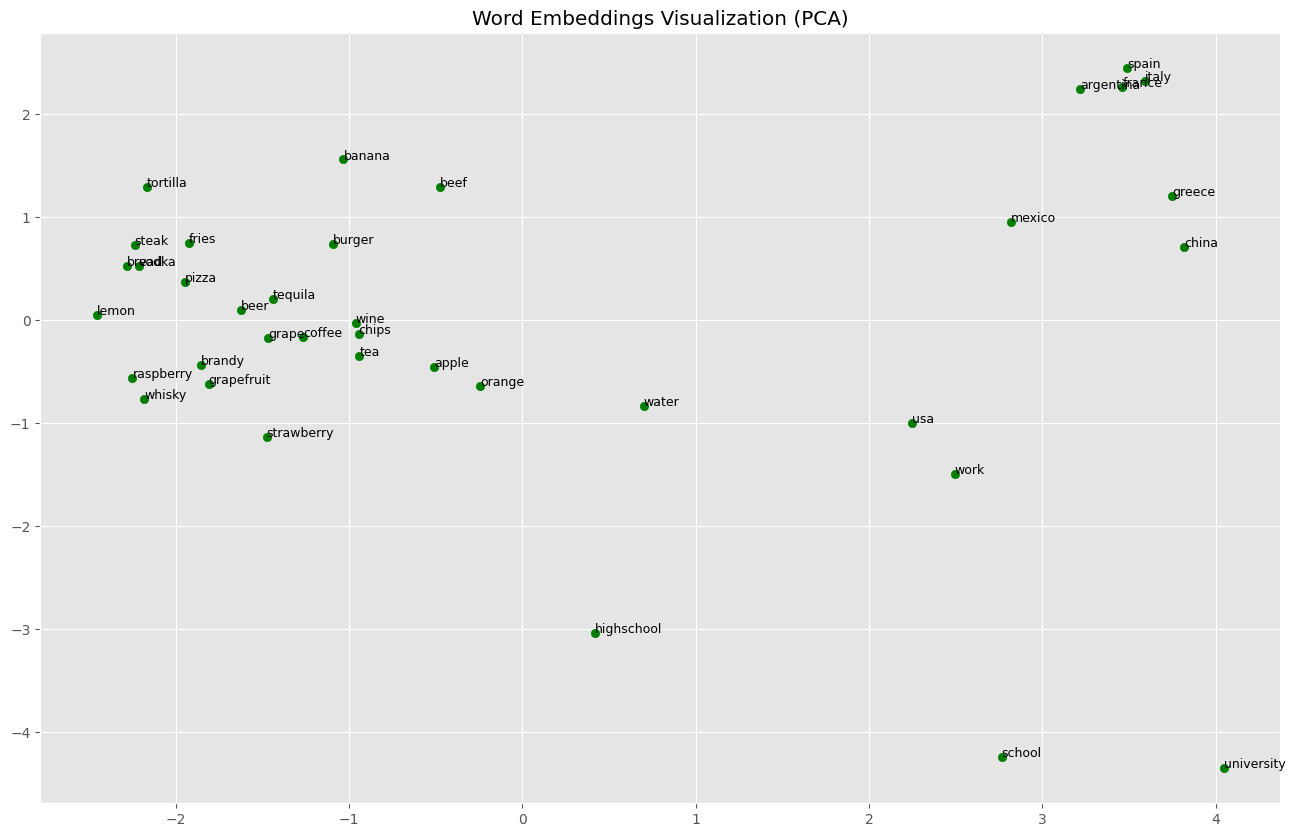

In [15]:
plot_embeddings(PATH, words, emb_dim, embeddings_dict, PCA)

## Visualize embeddings in 2D using TSNE technique

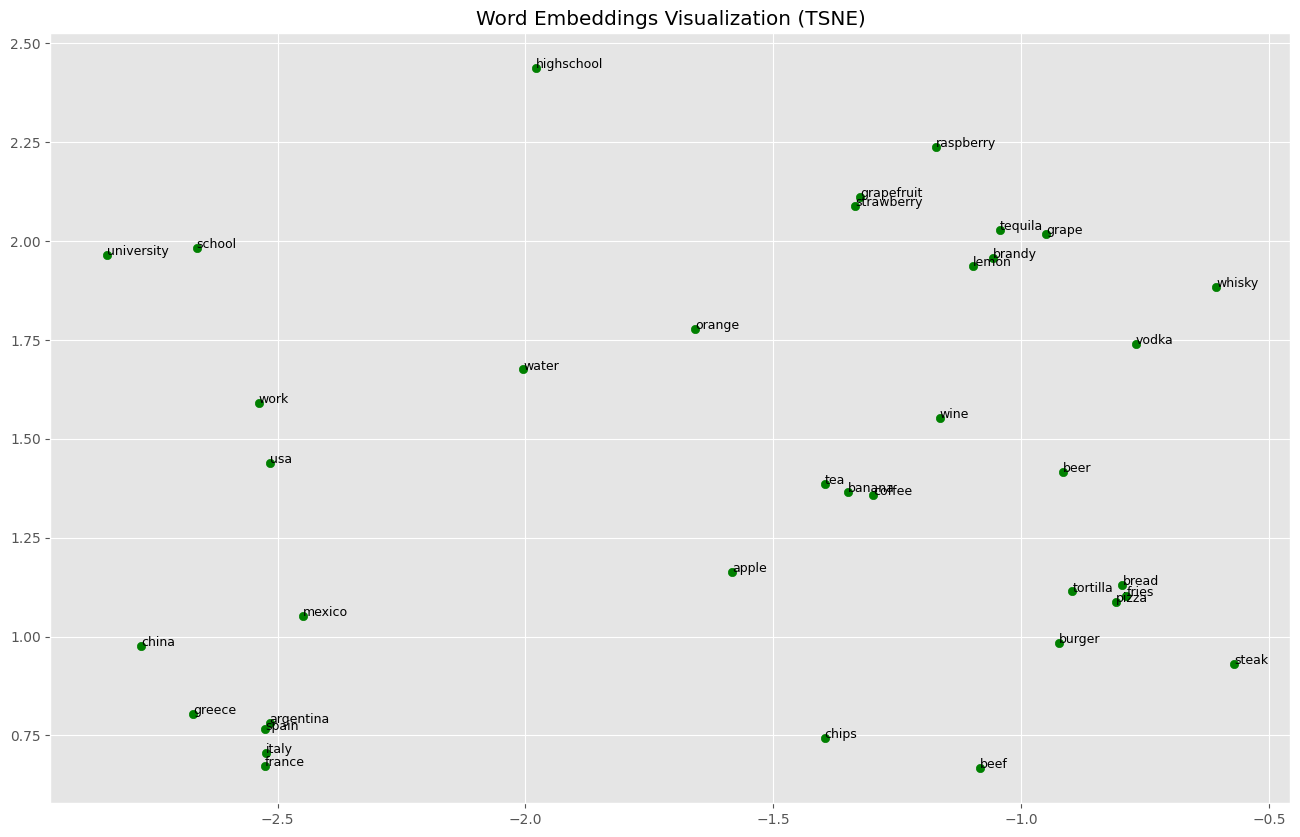

In [16]:
embeddings = plot_embeddings(PATH, words, emb_dim, embeddings_dict, TSNE)

**Cosine similarity**

"Cosine similarity is a metric used to measure the similarity of two vectors. Specifically, it measures the similarity in the direction or orientation of the vectors ignoring differences in their magnitude or scale. Both vectors need to be part of the same inner product space, meaning they must produce a scalar through inner product multiplication. The similarity of two vectors is measured by the cosine of the angle between them."

This is how it is calculated:

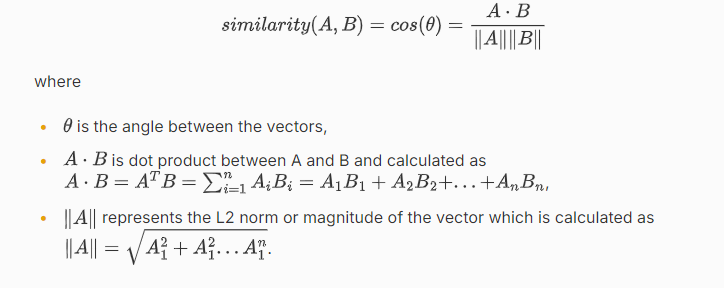

Karabiber, F. (s. f.). Cosine similarity. https://www.learndatasci.com/glossary/cosine-similarity/


# **Word Similarity**


*Instructions: Implement a function that takes a word as input and returns the 'n' most similar words based on their embeddings. You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.*



### function **find_most_similar()**





In [33]:
def find_most_similar(word, embeddings_dict, top_n=10):
    # First, let's make sure the word is in the dictionary
    if word not in embeddings_dict:
        # if it is not found, print the reason why the function will stop
        print(f"The word '{word}' is not in the embeddings dictionary.")
        # if it is not, return an empty array
        return []

    # get the vector with the embeddings of the word
    target_vector = embeddings_dict[word]

    # Initilize a list to store the top n similar words
    similarities = []

    # loop all the elements of the dictionary
    for dict_word, embedding in embeddings_dict.items():
        # if the evaluated word from the dictionary equals the word from the argument
        if dict_word == word:
            # skip this loop
            continue

        # Get cosine similarity
        # np.dot returns the dot product of vectors a and b, this will measure how close
        # focus vector analized in this loop is from vector_result (product of analogy formula used before)
        # the we will apply the cosine similarity formula explain in the markdown cell above
        # using numpy norm to measure the size of the vectors
        similarity = np.dot(target_vector, embedding) / (norm(target_vector) * norm(embedding))

        # Add each word from the dictionary and its similarity value as a tuple to the similarities list
        similarities.append((dict_word, similarity))

    # sort the list of words by similarity
    # key defines a function with the sorting criteria
    # lambda x: x[1] is an anonymous function that will take an element of similarities
    # 'x' and since it is a tuple, it will return x[1], that means the similarity value
    # calculated using the cosine similarity formula
    # reverse=True indicates the sorting type, in this case descending, highest similary value on top
    similarities.sort(key=lambda x: x[1], reverse=True)

    # Return top n results, they are sorted by highest similarity
    return similarities[:top_n]

*This was part of the code provided in the excercise template, the word we pass as an argument of our function is "mexico" it will find the top 10 most similar words*

In [34]:
most_similar = find_most_similar('mexico', embeddings_dict)

*This code was also provided in the template of the excercise, this code will print the 10 most similar words to the word "mexico"*

In [35]:
for i, w in enumerate(most_similar, 1):
    print(f'{i} ---> {w[0]}')

1 ---> mexican
2 ---> venezuela
3 ---> colombia
4 ---> peru
5 ---> chile
6 ---> puerto
7 ---> rico
8 ---> cuba
9 ---> guatemala
10 ---> panama


# **Word Analogies**

*Instructions: Implement a function to solve analogies between words. For example, "man is to king as woman is to ____". You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.*

### function **analogy()**

This function will process 3 words and create an analogy using this formula:

vector 2 - vector 1 + vector 3 = vector result

In the example of man, king, woman, it would look like this:

king - man + woman = queen?

I will explain this, king - man + woman is the female version of a king, that means a queen.

It will print a template text like:

'word 1 ' is to a 'word 2' as 'word 3' is to 'result'

And it will return the closest word to be the answer (result with highest similarity)

In [27]:
def analogy(word1, word2, word3, embeddings_dict):
    # Make sure all 3 words are in the dictionary, if one is missing return None
    if word1 not in embeddings_dict or word2 not in embeddings_dict or word3 not in embeddings_dict:
        # print the reason why the function didn't complete the process
        print("One or more words are not in the embeddings dictionary.")
        # return empty string
        return ""

    # Get the vectors of the 3 words using the dictionary
    vector1 = embeddings_dict[word1]
    vector2 = embeddings_dict[word2]
    vector3 = embeddings_dict[word3]

    # Calculate the resulting vector of the analogy using the formula
    vector_result = vector2 - vector1 + vector3

    # Initialize the variable that will hold the final response
    closest_word = ""
    # initilize the variable that will store the max similarity of the vectors in the dictionary
    # and the vector_result, it will start with infinite negative because
    # some results return negative values
    max_similarity = -np.inf

    # iterate the elements in the dictionary to find the most similar vector
    for word, embedding in embeddings_dict.items():
        # exclude the 3 words passed as arguments
        # they can't be the answer, this way we avoid scenarios like: 'man' is to 'king' as a 'woman' is to 'woman'
        if word in [word1, word2, word3]:
            # skip loop if evaluated word equals one from the arguments
            continue

        # Get cosine similarity
        # np.dot returns the dot product of vectors a and b, this will measure how close
        # focus vector analized in this loop is from vector_result (product of analogy formula used before)
        # the we will apply the cosine similarity formula explain in the markdown cell above
        # using numpy norm to measure the size of the vectors
        similarity = np.dot(vector_result, embedding) / (norm(vector_result) * norm(embedding))

        # If similarity of evaluated word is higher than the max similarity found so far,
        # replace the max similarity and set the variable closest_word to the evaluated word in this loop
        if similarity > max_similarity:
            max_similarity = similarity
            closest_word = word
    # Print a text of the analogy, the resulting word and the similarity value
    print(f"Analogy result: '{word1}' is to '{word2}' as a '{word3}' is to '{closest_word}' (Similarity value: {max_similarity})")
    return closest_word

In [28]:
analogy('man', 'king', 'woman', embeddings_dict)

Analogy result: 'man' is to 'king' as a 'woman' is to 'queen' (Similarity rate: 0.8609581589698792)


'queen'